[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Workshop-2024/blob/main/Day%2008%3A%20Neural%20Networks%20and%20Deep%20Learning%20Basics/Part3_Build_Neural_Network_MNIST.ipynb)


# Part 3: Build a Neural Network with the MNIST Dataset

In this notebook, we will build a simple neural network using **TensorFlow** and **Keras** to classify images from the **MNIST dataset**, which contains 70,000 images of handwritten digits (0-9). The network will learn to recognize the digits and predict the correct labels for new, unseen images.

---

### Step 1: Import Libraries and Load the MNIST Dataset

We'll start by loading the MNIST dataset, which is included in the **TensorFlow/Keras** library.

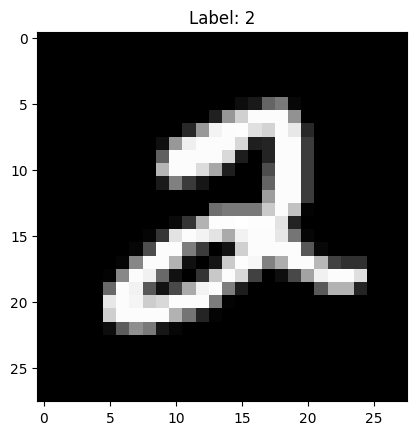

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualize the first image in the training set
plt.imshow(train_images[5], cmap='gray')
plt.title(f'Label: {train_labels[5]}')
plt.show()

---

### Step 2: Build the Neural Network Model

We'll now build a simple neural network using the **Sequential API** in Keras. The network will have:
- **Input layer**: Flatten the 28x28 pixel images into a 1D array of size 784.
- **Hidden layer**: A fully connected layer with 128 neurons and the **ReLU activation** function.
- **Output layer**: A fully connected layer with 10 neurons (one for each digit class) and the **Softmax activation** function.

In [18]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D vectors
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 digit classes) and Softmax
])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

---

### Step 3: Compile the Model

Before training the model, we need to compile it by specifying:
- **Optimizer**: We'll use the **Adam** optimizer.
- **Loss function**: Since we are solving a multi-class classification problem, we'll use **sparse categorical crossentropy**.
- **Metrics**: We'll track the **accuracy** of the model during training.

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---

### Step 4: Train the Model

We will now train the model using the **60,000 training images** for 5 epochs and validate its performance on the **10,000 test images**.

In [20]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8762 - loss: 0.4377 - val_accuracy: 0.9610 - val_loss: 0.1326
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9632 - loss: 0.1262 - val_accuracy: 0.9699 - val_loss: 0.1022
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9758 - loss: 0.0815 - val_accuracy: 0.9741 - val_loss: 0.0847
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9822 - loss: 0.0581 - val_accuracy: 0.9718 - val_loss: 0.0880
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9861 - loss: 0.0469 - val_accuracy: 0.9767 - val_loss: 0.0792


---

### Step 5: Evaluate the Model

After training, we will evaluate the model on the test dataset to check its accuracy on unseen data.

In [21]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - 1ms/step - accuracy: 0.9767 - loss: 0.0792

Test accuracy: 0.9767000079154968


---

### Step 6: Visualize the Predictions

We will now visualize the predictions for a few test images. The model will predict the digit and we will compare it with the actual label.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


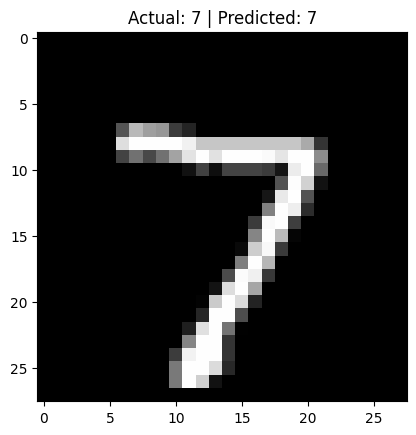

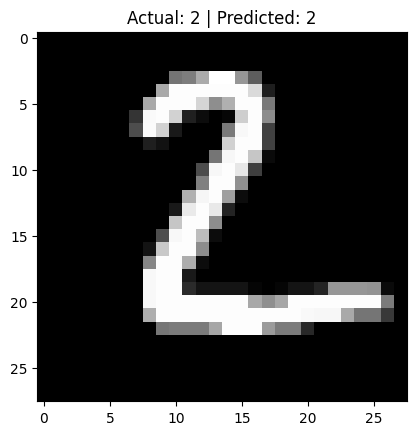

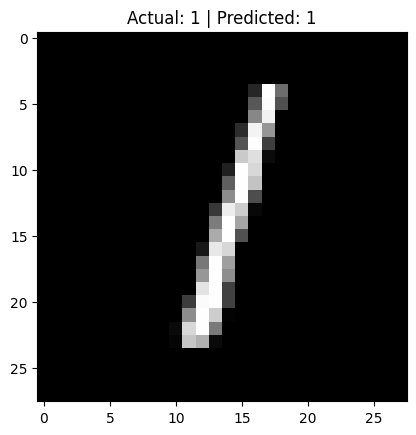

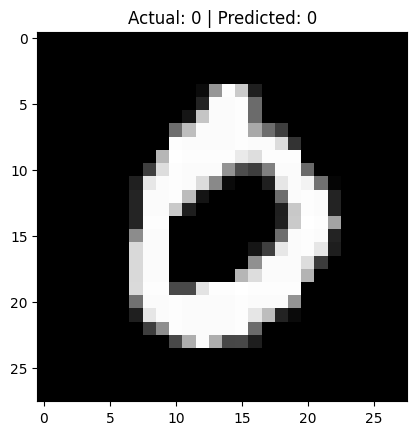

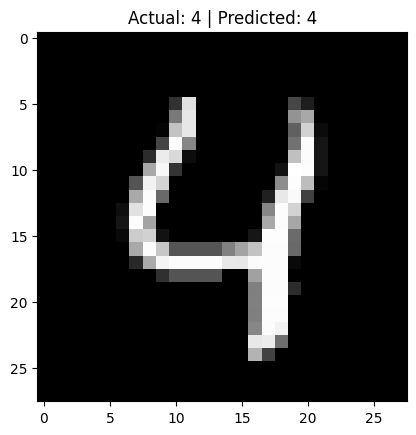

In [22]:
# Predict on the test images
predictions = model.predict(test_images)

# Plot a few test images and show the predicted labels
for i in range(5):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f'Actual: {test_labels[i]} | Predicted: {np.argmax(predictions[i])}')
    plt.show()

---

### Step 7: Visualizing the Training Progress

We'll plot the model's accuracy and loss during training to see how well it performed over the epochs.

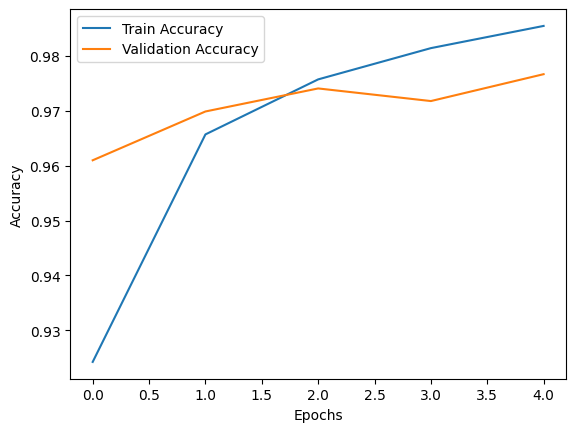

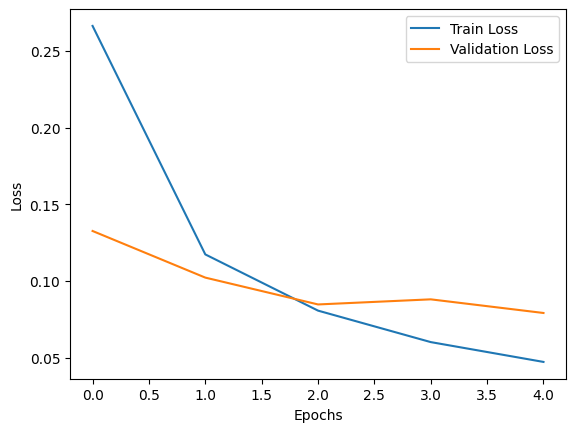

In [23]:
# Plot training & validation accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io
import cv2

# Step 1: Preprocess the image (convert to grayscale, resize to 28x28)
def preprocess_image(img_path):
    # Open the image using PIL
    img = Image.open(img_path).convert('L')  # Convert to grayscale

    # Resize the image to 28x28 pixels
    img_resized = img.resize((28, 28))

    # Convert the image to numpy array
    img_array = np.array(img_resized)

    # Normalize the image (convert to float and divide by 255.0)
    img_normalized = img_array / 255.0

    # Show the original image, resized and normalized images
    plt.subplot(1, 3, 1)
    plt.imshow(np.array(img), cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(np.array(img_resized), cmap='gray')
    plt.title('Resized Image (28x28)')

    plt.subplot(1, 3, 3)
    plt.imshow(img_normalized, cmap='gray')
    plt.title('Normalized Image')

    plt.show()

    # Reshape the image to add batch dimension (for prediction)
    img_reshaped = img_normalized.reshape(1, 28, 28)
    return img_reshaped

# Step 2: Use the model to predict the uploaded image
def predict_image(img_reshaped, model):
    prediction = model.predict(img_reshaped)
    predicted_digit = np.argmax(prediction)

    print(f"The model predicts this digit as: {predicted_digit}")

    return predicted_digit




In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

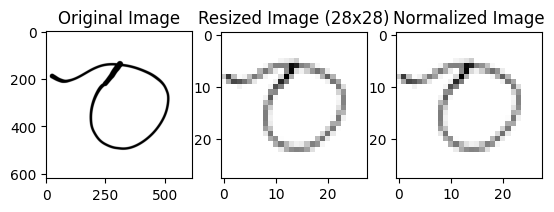

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The model predicts this digit as: 3


In [27]:
# Let's simulate the full process
img_path ='/content/sample_data/dataset/test_image0.png'  # Step 1: Upload the image
img_reshaped = preprocess_image(img_path)  # Step 2: Preprocess the image
predicted_digit = predict_image(img_reshaped, model)  # Step 3: Predict the digit

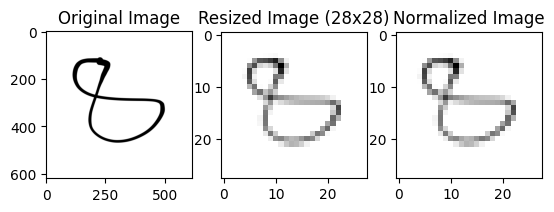

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The model predicts this digit as: 3


In [28]:
# Let's simulate the full process
img_path ='/content/sample_data/dataset/test_image8.png'  # Step 1: Upload the image
img_reshaped = preprocess_image(img_path)  # Step 2: Preprocess the image
predicted_digit = predict_image(img_reshaped, model)  # Step 3: Predict the digit

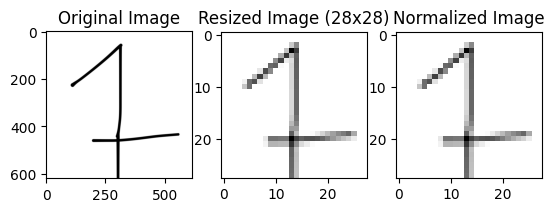

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The model predicts this digit as: 7


In [29]:
# Let's simulate the full process
img_path ='/content/sample_data/dataset/test_image7.png'  # Step 1: Upload the image
img_reshaped = preprocess_image(img_path)  # Step 2: Preprocess the image
predicted_digit = predict_image(img_reshaped, model)  # Step 3: Predict the digit